How are in-demand skills trending for Data Analysts?

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df.job_skills.apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_CA = df[(df.job_title_short=='Data Analyst')
              & (df.job_country=='Canada')].copy()

In [41]:
df_DA_CA['job_posted_month'] = df_DA_CA.job_posted_date.dt.month

In [42]:
df_DA_CA_explode = df_DA_CA.explode('job_skills')

In [52]:
df_DA_CA_pivot = df_DA_CA_explode.pivot_table(index = 'job_posted_month', columns= 'job_skills', aggfunc='size', fill_value=0)

In [53]:
df_DA_CA_pivot.loc['Total'] = df_DA_CA_pivot.sum()

In [56]:
df_DA_CA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,heroku,trello,rust,firestore,monday.com,symphony,fastapi,electron,django,no-sql
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,143,105,92,62,55,39,36,20,29,29,...,0,0,1,1,0,0,0,0,1,0
2,78,49,40,21,27,16,22,17,14,15,...,0,0,0,0,0,1,0,1,0,0
3,79,49,44,37,23,26,24,9,18,14,...,0,0,0,0,0,0,0,0,0,0
4,103,48,56,41,36,25,26,14,13,14,...,1,0,0,0,0,0,0,0,0,0
5,91,66,55,49,32,28,26,17,14,11,...,0,1,0,0,0,0,0,0,0,0
6,90,71,50,46,33,23,20,15,16,15,...,0,0,0,0,1,0,0,0,0,1
7,104,75,60,55,50,32,20,22,14,9,...,0,0,0,0,0,0,0,0,0,0
8,100,48,64,59,45,39,14,14,12,15,...,0,0,0,0,0,0,0,0,0,0
9,126,72,80,63,54,46,26,19,21,18,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_DA_CA_pivot = df_DA_CA_pivot[df_DA_CA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_CA_pivot



job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,jquery,ubuntu,arch,openstack,mariadb,watson,nltk,neo4j,mxnet,no-sql
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,143,105,92,62,55,39,36,20,29,29,...,0,0,0,0,0,0,0,0,1,0
2,78,49,40,21,27,16,22,17,14,15,...,0,0,0,0,0,0,0,0,0,0
3,79,49,44,37,23,26,24,9,18,14,...,1,0,0,0,0,0,0,0,0,0
4,103,48,56,41,36,25,26,14,13,14,...,0,0,0,0,0,0,0,1,0,0
5,91,66,55,49,32,28,26,17,14,11,...,0,0,0,0,0,1,1,0,0,0
6,90,71,50,46,33,23,20,15,16,15,...,0,0,0,0,0,0,0,0,0,1
7,104,75,60,55,50,32,20,22,14,9,...,0,1,0,1,0,0,0,0,0,0
8,100,48,64,59,45,39,14,14,12,15,...,0,0,0,0,0,0,0,0,0,0
9,126,72,80,63,54,46,26,19,21,18,...,0,0,0,0,1,0,0,0,0,0


In [62]:
df_DA_CA_pivot = df_DA_CA_pivot.iloc[:,0:5]

df_DA_CA_pivot

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
1,143,105,92,62,55
2,78,49,40,21,27
3,79,49,44,37,23
4,103,48,56,41,36
5,91,66,55,49,32
6,90,71,50,46,33
7,104,75,60,55,50
8,100,48,64,59,45
9,126,72,80,63,54


<Axes: xlabel='job_posted_month'>

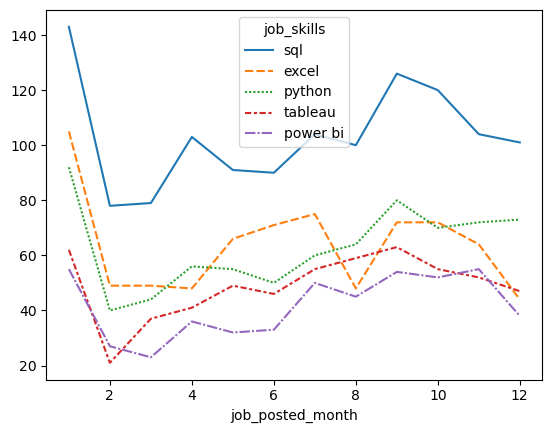

In [66]:
sns.lineplot(data = df_DA_CA_pivot)

In [73]:
# df_DA_CA_monthlypostings = df_DA_CA.job_posted_month.value_counts().reset_index(name = 'job_postings')
df_DA_CA_monthlypostings = df_DA_CA.job_posted_month.value_counts().sort_index()
df_DA_CA_monthlypostings

job_posted_month
1     286
2     148
3     155
4     179
5     160
6     183
7     208
8     183
9     209
10    234
11    203
12    217
Name: count, dtype: int64

In [74]:
df_DA_CA_pivot.div(df_DA_CA_monthlypostings, axis = 0)

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
1,0.500000,0.367133,0.321678,0.216783,0.192308
2,0.527027,0.331081,0.270270,0.141892,0.182432
3,0.509677,0.316129,0.283871,0.238710,0.148387
4,0.575419,0.268156,0.312849,0.229050,0.201117
5,0.568750,0.412500,0.343750,0.306250,0.200000
6,0.491803,0.387978,0.273224,0.251366,0.180328
7,0.500000,0.360577,0.288462,0.264423,0.240385
8,0.546448,0.262295,0.349727,0.322404,0.245902
9,0.602871,0.344498,0.382775,0.301435,0.258373


In [76]:
df_DA_CA_percent = df_DA_CA_pivot.div(df_DA_CA_monthlypostings/100, axis = 0)

In [84]:
df_DA_CA_percent

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
1,50.000000,36.713287,32.167832,21.678322,19.230769
2,52.702703,33.108108,27.027027,14.189189,18.243243
3,50.967742,31.612903,28.387097,23.870968,14.838710
4,57.541899,26.815642,31.284916,22.905028,20.111732
5,56.875000,41.250000,34.375000,30.625000,20.000000
6,49.180328,38.797814,27.322404,25.136612,18.032787
7,50.000000,36.057692,28.846154,26.442308,24.038462
8,54.644809,26.229508,34.972678,32.240437,24.590164
9,60.287081,34.449761,38.277512,30.143541,25.837321


In [86]:
df_DA_CA_percent.reset_index(inplace = True)

In [87]:
df_DA_CA_percent

job_skills,job_posted_month,sql,excel,python,tableau,power bi
0,1,50.000000,36.713287,32.167832,21.678322,19.230769
1,2,52.702703,33.108108,27.027027,14.189189,18.243243
2,3,50.967742,31.612903,28.387097,23.870968,14.838710
3,4,57.541899,26.815642,31.284916,22.905028,20.111732
4,5,56.875000,41.250000,34.375000,30.625000,20.000000
5,6,49.180328,38.797814,27.322404,25.136612,18.032787
6,7,50.000000,36.057692,28.846154,26.442308,24.038462
7,8,54.644809,26.229508,34.972678,32.240437,24.590164
8,9,60.287081,34.449761,38.277512,30.143541,25.837321
9,10,51.282051,30.769231,29.914530,23.504274,22.222222


In [92]:
df_DA_CA_percent['job_posted_month_name'] = df_DA_CA_percent.job_posted_month.apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))

In [93]:
df_DA_CA_percent

job_skills,job_posted_month,sql,excel,python,tableau,power bi,job_posted_month_name
0,1,50.000000,36.713287,32.167832,21.678322,19.230769,Jan
1,2,52.702703,33.108108,27.027027,14.189189,18.243243,Feb
2,3,50.967742,31.612903,28.387097,23.870968,14.838710,Mar
3,4,57.541899,26.815642,31.284916,22.905028,20.111732,Apr
4,5,56.875000,41.250000,34.375000,30.625000,20.000000,May
5,6,49.180328,38.797814,27.322404,25.136612,18.032787,Jun
6,7,50.000000,36.057692,28.846154,26.442308,24.038462,Jul
7,8,54.644809,26.229508,34.972678,32.240437,24.590164,Aug
8,9,60.287081,34.449761,38.277512,30.143541,25.837321,Sep
9,10,51.282051,30.769231,29.914530,23.504274,22.222222,Oct


In [97]:
df_DA_CA_percent.set_index('job_posted_month_name', inplace = True)

In [98]:
df_DA_CA_percent.drop(columns = 'job_posted_month', inplace=True)

<Axes: xlabel='job_posted_month_name'>

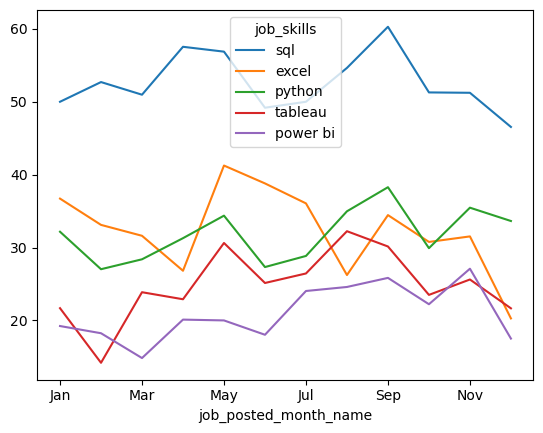

In [100]:
df_DA_CA_percent.plot(kind = 'line')

<Axes: xlabel='job_posted_month_name'>

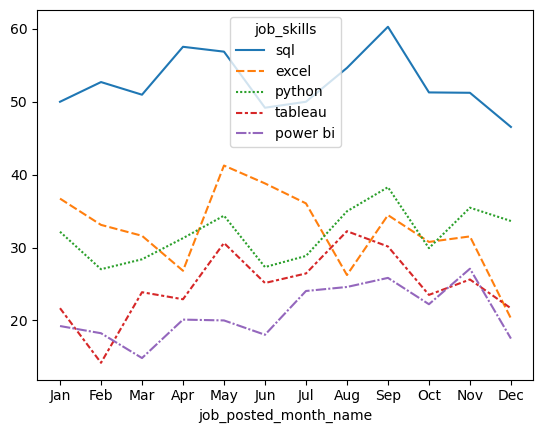

In [101]:
sns.lineplot(data = df_DA_CA_percent)

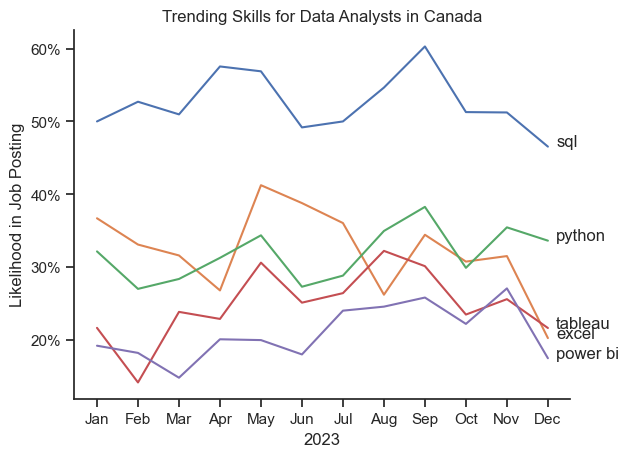

In [114]:
sns.lineplot(data = df_DA_CA_percent, dashes = False, legend = 'full')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Skills for Data Analysts in Canada')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
ax = plt.gca()

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_DA_CA_percent.iloc[-1,i], df_DA_CA_percent.columns[i])